# Quantitative Biology and Biophysics (AS.020.674/618)	Spring 2024
## Lab #1
## January 26, 2024

#  Distributions and Approximations

In class, we discussed the binomial distribution, and how if we have a large N, it approximates a continuous distribution that can approximate a Gaussian distribution. We also discussed some useful approximations: Sterlings approximation & the Taylor Expansion. In this lab, you will explore the properties of these distributions and approximations to hopefully gain a better understanding of their properties.

# Libraries you will need

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #for graphingModuleNotFoundError: No module named 'seaborn'

from scipy.special import factorial
from scipy.stats import binom
from scipy.stats import norm
from scipy.optimize import minimize
from scipy.stats import norm #print where you are at when running a for loop
from tqdm.notebook import tqdm

import openpyxl

# Discrete vs. Continuous variables

When creating vectors, sometimes you need to create vectors of discrete variables (such as number of animals) vs. continuous variables (such as mass). There are two useful functions for doing this:

 ### For discrete values:

`np.arange(start,end_exclusive)`

Example: `np.arange(0,10)` will produce a vector of integers from 0 to 9


 ### For continuous values:

`np.linspace(start,end_inclusive)`

Example: `np.linspace(0,10)` will produce a vector of 50 evenly spaced values from 0 to 10. The default number of values is 50, so if you want to specify this for X evenly spaced values, use `np.linspace(0,10, num=X)`.


# Problem 1: The Binomial Distribution

As I mentioned in class, this is a useful distribution when making predictions for binary phenomena. A common problem encountered in biology is making crosses, and deciding how many animals to screen for a particular genotype. Here is a common scenario:

You want to make a double recessive mutant for alleles A & B.

First, you cross mutant A with mutant B:

P0 generation: aaBB x AAbb

This produces heterozygous progeny:

F1 generation: AaBb

You then take siblings from this generation and cross them.

**What is the probability of finding an F2 animal that is homozygous dominant for A (i.e. AA)?**

## <font color='red'>Student Input Cell: 1 point</font> 

In [2]:
AA = 0.25

**What is the probability of finding an F2 animal that is homozygous recessive for B (i.e. bb)?**

## <font color='red'>Student Input Cell: 1 point</font> 

In [3]:
bb = 0.25

**What is the probability of finding an F2 animal with the AAbb genotype?**

## <font color='red'>Student Input Cell: 1 point</font> 

In [4]:
# 1/16
AAbb = 0.0625

Let's look at the possible outcomes of picking 20 animals. **Given the above probability, what is the expected mean (µ) probability for picking a double homozygous recessive animal if you pick 20 animals total? What is the variance (σ^2)?**

## <font color='red'>Student Input Cell: 3 points</font> 

In [5]:
p = 0.0625
N = 20
mu = p*N
sigma2 = N*(p*(1-p))
print(mu,sigma2)

1.25 1.171875


**Now let's plot what this distribution of possible outcomes looks like for picking 0->20 animals.** To make the coding easier, rather than coding the entire formula from class, you can use scipy's `binom.pmf` function which you imported above.

`P = binom.pmf(k, N, p)`

Check to see whether the values for your mean and standard deviation match what you expect with your distribution.


## <font color='red'>Student Input Cell: 4 points</font> 

Text(0, 0.5, 'P(k)')

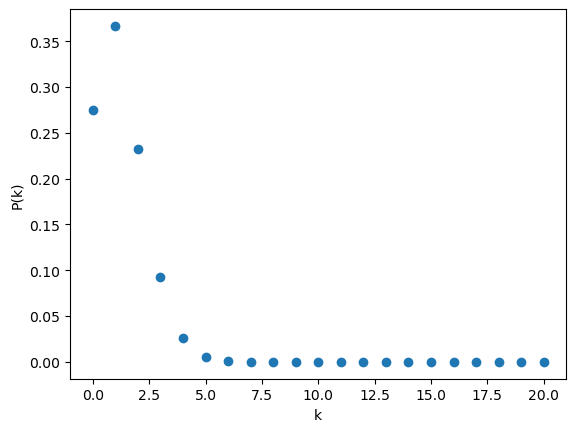

In [6]:
# k needs to be integers

k = range(0,N+1)
P = binom.pmf(k,N,p)

# Plot binomial distribution
# Since this is a DISCRETE distribution, you should plot markers, and not lines.
# i.e. plt.plot(k,p,'o')

plt.plot(k,P,'o')

plt.xlabel('k')
plt.ylabel('P(k)')

**What is the probability of NOT finding an aabb F2?**

## <font color='red'>Student Input Cell: 1 point</font> 

In [7]:
not_aabb = P[0] 
print(not_aabb)

0.2750587898883363


**What is the probability of picking AT LEAST 1 aabb F2?**

## <font color='red'>Student Input Cell: 1 point</font> 


In [8]:
p_aabb = 1 - not_aabb
print(p_aabb)

0.7249412101116637


Let's see how the binomial distribution compares to the Gaussian distribution. For this, we will also use a convenient scipy function `norm.pdf` that you imported above. The inputs are k,mean (µ), and standard deviation (the SQUARE ROOT of the variance you calculated above).

`P = norm.pdf(k, mu, np.sqrt(sigma2))`

**Compare the binomial and Gaussian distributions for `N = 5, 10, 20, 50`, and `p = 0.5`.**

For each N:

1. Calculate the expected mean.
2. Calculate the expected standard deviation.
3. Make a subplot with 4 different panels.
3. Plot the binomial distribution for the span of N. **'k' should be integers.** Use markers ('o') for this plot.
4. Plot the corresponding Gaussian distribution for the span of N as a line. **'k' does not need to be integers.**

## <font color='red'>Student Input Cell: 10 points</font> 

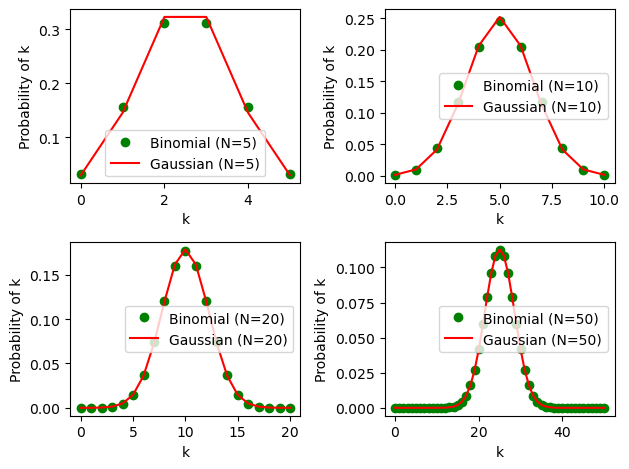

In [9]:
fig, axs = plt.subplots(2,2)
N = [5, 10, 20, 50]
n = 0
p = 0.5
axs = axs.ravel()
for i in N:
    k = range(0,i+1)
    mu = p * i
    sigma2 = i*p*(1-p)
    norm_P = norm.pdf(k, mu, np.sqrt(sigma2))
    P = binom.pmf(k, i, p)
    axs[n].plot(k,P, 'o', color = 'green', label='Binomial (N={})'.format(i))
    axs[n].plot(k,norm_P, '-', color ='red', label='Gaussian (N={})'.format(i))
    axs[n].set_xlabel('k')
    axs[n].set_ylabel('Probability of k')
    axs[n].legend()

    n += 1

plt.tight_layout()
plt.show()



# Problem 2: Stirling's Approximation

In class, I discussed that Stirling's approximation is a good approximation of N!. Let's see how accurate that statement is. The values of N! grow SUPER LARGE as N grows, so we will compare ln(N!) to Stirling's approximation of ln(N!).

Numpy has a factorial function, but it only accepts scalar inputs. To make your life easier, I have had you import scipy's `factorial` function above, which accepts vector inputs.

Example:

`N = [1,2]`


`N_factorial = factorial(N)`

**Make 2 Plots:**

1. Plot N vs ln(N!), and N vs. Stirling's Approximation of ln(N!) in the same axes.

2. Plot N vs. the ratio of absolute difference between ln(N!) and Stirling's approximation to ln(N!).

  i.e. |lnN! - Stirling| / lnN!

**Have N span 2 to 20. REMEMBER: The values of N must be integers.**

## <font color='red'>Student Input Cell: 13 points</font> 

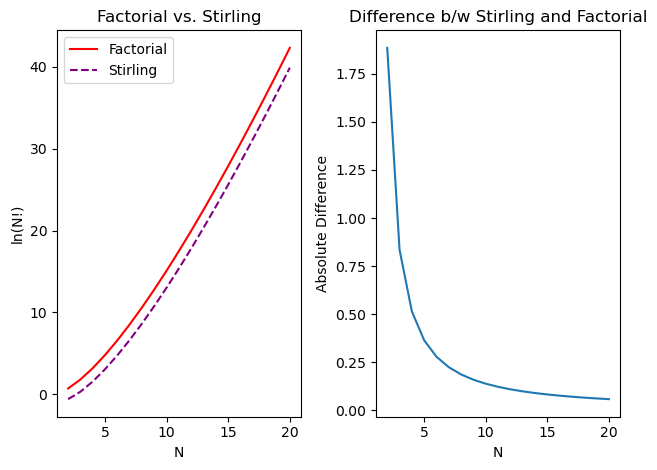

In [10]:
N = range(2,21)
Nfactorial = factorial(N)

stirling = []

for i in N:
    temp = i * np.log(i) - i
    stirling.append(temp)


abs_difference = []
Nfact = []

for i in range(0,len(stirling)):
    diff = np.abs((np.log(Nfactorial[i])-stirling[i]))/np.log(Nfactorial[i])
    abs_difference.append(diff)
    Nfact.append(np.log(Nfactorial[i]))



fig, (ax1,ax2) = plt.subplots(1,2)

ax1.plot(N, Nfact, label = 'Factorial', color = 'red')
ax1.plot(N, stirling, '--', label = 'Stirling', color = 'purple')
ax1.set_xlabel("N")
ax1.set_ylabel("ln(N!)")
ax1.legend()
ax1.set_title("Factorial vs. Stirling")
ax2.plot(N, abs_difference)
ax2.set_xlabel("N")
ax2.set_ylabel("Absolute Difference")
ax2.set_title("Difference b/w Stirling and Factorial")

plt.tight_layout()
plt.show()


# Problem 3: Taylor Approximation

In class, we discussed the Taylor Approximation of a function. It essentially simplifies a complicated function into a sum of polynomials centered at a point of interest ('a').

<img src="http://www.gordus.org/public_images/taylor1.png" style="width: 3000px;"/>

Biological systems (or any system, really) cannot respond infinitely fast to a stimulus. For example, a protein has a time delay when it binds a molecule, and a time delay when it releases the molecule (the on and off rate). The difference between these rates can be considered the "kernel" that filters the response to the stimulus. Here is an example of a kernel function:

<img src="http://www.gordus.org/public_images/kernel.png" style="width: 200px;"/>

**Let's see what a Taylor Approximation of this function looks like. Please do the following:**

1. Plot the function over the span of 0 to 5.
2. You'll notice it peaks at a certain point. Calculate this point by taking the derivative of the kernel, setting it to 0, and solving for x. This solution will be 'a'.

As a reminder, the derivative of an exponential is:

<img src="http://www.gordus.org/public_images/dxex.png" style="width: 200px;"/>

3. Now calculate an approximation of f(x) centered at 'a' by taking the Taylor Approximation to the 1st derivative.
4. Calculate an approximation centered at 'a' again, but calculate the Taylor approximation up to the second derivative.
5. Plot f(x), and both approximations centered at 'a'. You'll want to set the y limit from 0 to f(a)+0.1 so you can see their relationships better. How good is the approximation near a? Far from it?
6. Re-perform steps 3-5, but now calculate the approximation at b = a + 1.

To make this easier, I advise that you create 3 functions to calculate f(x), the first derivative, and the second derivative.

## <font color='red'>Student Input Cell: 25 points</font> 

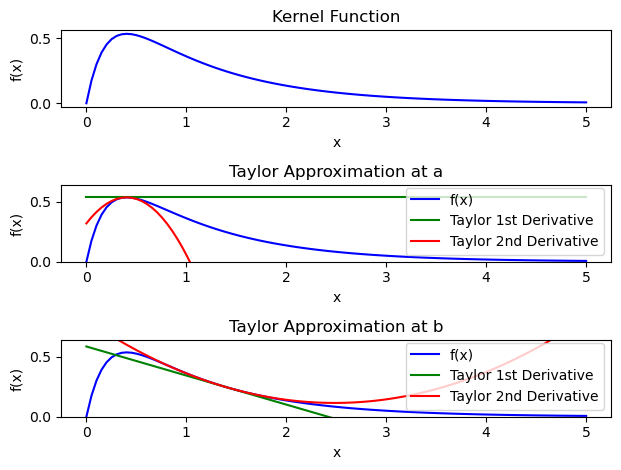

In [11]:
# Taylor Approximation

x = np.linspace(0, 5, 100)


def f(x): 
    return np.exp(-x) - np.exp(-5*x)

def df(x):
    return (5*np.exp(-5*x)) - np.exp(-x)

def df2(x):
    return np.exp(-x) - (25*np.exp(-5*x))

a = (np.log(5))/4
taylor1 = f(a) + (df(a)*(x-a))
taylor2 = taylor1 + (1/2)*df2(a)*((x-a)**2)

b = a + 1
taylor1b = f(b) + (df(b)*(x-b))
taylor2b = taylor1b + (1/2)*df2(b)*((x-b)**2)



fig, (ax1,ax2,ax3) = plt.subplots(3,1)

ax1.plot(x, f(x), color = 'blue')
ax1.set_xlabel("x")
ax1.set_ylabel("f(x)")
ax1.set_title("Kernel Function")

ax2.plot(x, f(x), label = 'f(x)', color = 'blue')
ax2.plot(x, taylor1, label = 'Taylor 1st Derivative', color = 'green')
ax2.plot(x, taylor2, label = 'Taylor 2nd Derivative', color = 'red')
ax2.set_xlabel("x")
ax2.set_ylabel("f(x)")
ax2.set_ylim(bottom = 0, top = f(a)+0.1)
ax2.legend()
ax2.set_title("Taylor Approximation at a")

ax3.plot(x, f(x), label = 'f(x)', color = 'blue')
ax3.plot(x, taylor1b, label = 'Taylor 1st Derivative', color = 'green')
ax3.plot(x, taylor2b, label = 'Taylor 2nd Derivative', color = 'red')
ax3.set_xlabel("x")
ax3.set_ylabel("f(x)")
ax3.set_ylim(bottom = 0, top = f(a)+0.1)
ax3.legend()
ax3.set_title("Taylor Approximation at b")

plt.tight_layout()
plt.show()


# Problem 4: Plotting Data

We want to explore how these data look. To do this we will first plot this data in a variety of ways using seaborn.

1.	Produce a swarm plot of the data. (Since there are 100 data points, I recommend setting the marker size to 2, i.e. `size = 2`
2.	Produce a violin plot of the data.
3.	Produce a box plot of the data.
4.	Produce a bar plot of the data.

Since the data are in an excel file, the easiest thing to do is import the data using pandas.

## <font color='red'>Student Input Cell: 5 points</font> 

In [12]:
# Import data as dataframe
# Data values are the first column of the dataframe, and Data IDs are the second column.

file_path = "/Users/cmdb/Desktop/QBIO2_lab/lab_1/bob_pairing_data_2022.xlsx"

data_df = pd.read_excel(file_path)

## <font color='red'>Student Input Cell: 5 points</font> 

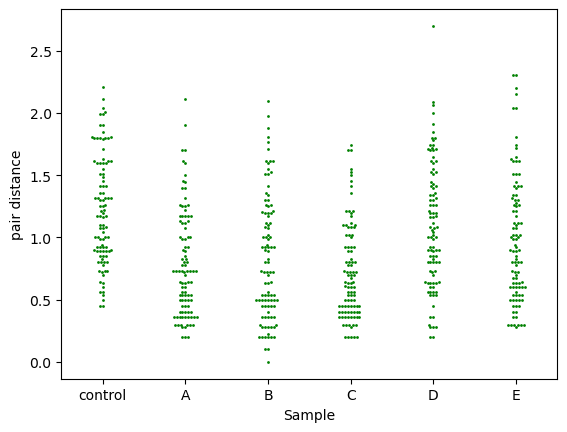

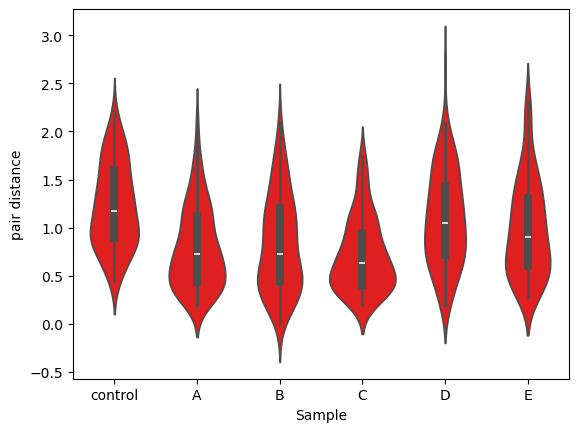

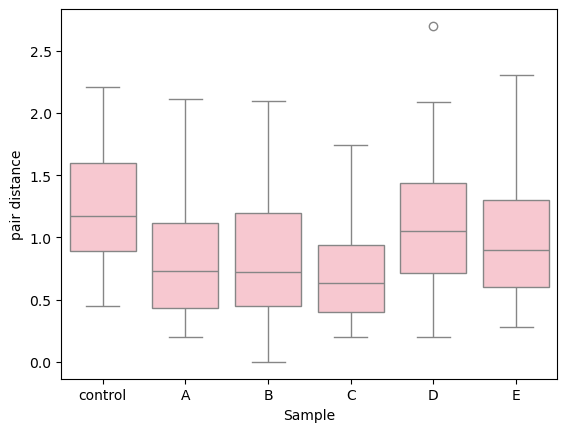

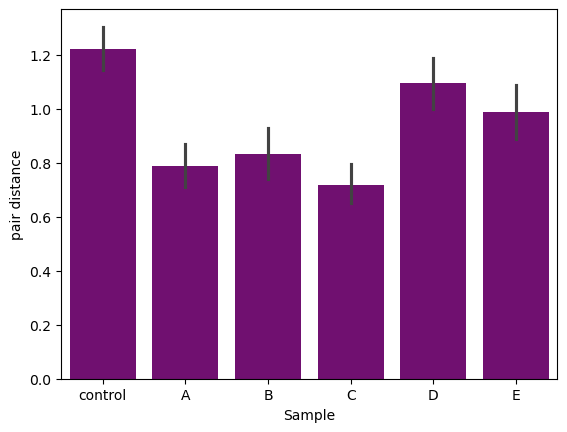

In [13]:
# Plot the 4 seaborn plots
# Swarm plot (size = 2)
sns.swarmplot(data = data_df, x = "Sample", y = "pair distance", s = 2, color = 'green')
plt.show()

# Violin plot
sns.violinplot(data = data_df, x = "Sample", y = "pair distance", color = 'red')
plt.show()

# Box plot
sns.boxplot(data = data_df, x = "Sample", y = "pair distance", color = 'pink')
plt.show()

# Bar plot
sns.barplot(data = data_df, x = "Sample", y = "pair distance", color = 'purple')
plt.show()

# Problem 5: Model Selection


## How to do math with arrays

I normally like to work in the realm of arrays, rather than DataFrames. This is because I like to leverage the power and speed of executing linear algebra functions instead of FOR loops. These functions are pre-compiled, so they are much faster. Iteratively going through arrays or DataFrames is computationally exhaustive, and take a long time to run when using large arrays of data.

So, first I make a numpy array where the **rows are observations, and columns are samples.**

In [14]:
#convert dataframe to numpy array
data_n = data_df.to_numpy()
data_n = pd.to_numeric(data_n[:,0])
data_n.resize(6,100)
data_n = np.transpose(data_n)


Next, I can compute the mean and standard deviation for every sample with one command, by setting the axis = 0.

In [15]:
# axis set to zero as columns are samples
mu = np.nanmean(data_n, axis = 0) #calculating mean for every sample - faster than for-loops
sigma = np.nanstd(data_n, axis = 0)

Isn't that great? Instead of creating a `for` loop and calculating the mean for each column, I simply told the function which axis to use to calculate the mean for the entire array. Both mu and sigma have 6 entries, because I calculated the mean for each column (down the rows, or `axis = 0`). If I had chosen `axis=1`, mu and sigma would be 100 elements long, because I would have calculated the mean and standard deviation of each row.

## Gaussian Log Likelihood Function

In the last exercise, I showed you how you can simply use the scipy.stats library for calculating common distributions. However, I would like you to get you more accustomed with performing math in python, so **I want you to calculate your own Gaussian probability distribution.**

<img src="http://www.gordus.org/public_images/gauss.png" style="width: 300px;"/>

There will be three inputs for your function: `x, mu, sigma`, which will be your `data_n` (x), mean (mu), and standard deviation (sigma).

To calculate the Gaussian function, we can again take advantage of using matrices, and negate the need to iteratively perform calculations with a `for` loop. A key detail here is when subtracting the mean (mu) from the columns of data_n. The rows of data_n are observations, and the columns are samples. I want to subtract each element of mu from its corresponding column of data_n, i.e. subtract `mu[0]` from `data_n[:,0]`, and `mu[1]` from `data[:,1]`, etc. 

Intuitively, you want to do this in a `for` loop. However, normally you could take advantage of linear algebra, and convert mu into a matrix with something called an identity matrix, and then subtract that from data_n, thus bypassing the need for a `for` loop.

HOWEVER, Python is accostomed to this, so it does the math for you. If you give it an arithmetic problem between a matrix and a vector, it will look at the length of the vector, and see if the matrix has a dimension with matching length. If it does, it will perform the arithmetic along this dimension. SO, in the example below, when I perform x - mu, Python does all the linear algegra for me. SO CONVENIENT.

In [16]:
# Example

example_data = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15]])
mu_test = np.mean(example_data, axis = 0)

mean_centered_data = example_data - mu_test

print(mean_centered_data)

[[-5. -5. -5. -5. -5.]
 [ 0.  0.  0.  0.  0.]
 [ 5.  5.  5.  5.  5.]]


## <font color='red'>Student Input Cell: 5 points</font> 

In [17]:
# Define Gaussian Function

def gauss_function(x,mu,sigma):
    # x is a matrix, mu and sigma are vectors
    answer = (1/np.sqrt(2* np.pi * (sigma**2)))*(np.exp(-((x-mu)**2)/(2*(sigma**2))))
    
    return answer

# To confirm your function above is correct, compare it to the solution you get with scipy's function by
# printing the absolume difference between the two. Round the answer. Useful functions:

# np.sum
# np.abs
# np.round

observed = norm.pdf(data_n, mu, sigma)
real = gauss_function(data_n, mu, sigma)

difference = np.round(np.abs(np.nansum(observed, axis = 0)-np.sum(real, axis = 0)))

print(difference)

[0. 0. 0. 0. 0. 0.]


Now that you have a function that calculates a Gaussian distribution, create another function that calculates the log-likelihood for that function:

<img src="http://www.gordus.org/public_images/gaussian_log2.png" style="width: 300px;"/>


## <font color='red'>Student Input Cell: 5 points</font> 

In [20]:
# Gaussian logL
    
def gausslogl(x, mu, sigma):
    # x is a matrix, mu and sigma are vectors
    answer = np.nansum(np.log(gausslogl(x,mu,sigma)), axis = 0)
    return answer

Now you can use your two functions to calculate the log-likelihood function for a Gaussian fit to your data.

## <font color='red'>Student Input Cell: 5 points</font> 

In [21]:
lp1 = gausslogl(data_n, mu, sigma)
print(lp1)

RecursionError: maximum recursion depth exceeded

## Double Gaussian Log Likelihood Function

Next up is calculating the log likelihood function for the double Gaussian. The double gaussian likelihood function is simply the log of the sum of two Gaussians. HOWEVER, first we need to find the optimal values of w, mu1, mu2, sigma1, and sigma2. Unlike the single gaussian, where we can simply calculate the mean and standard deviation, the double Gaussian does not have analytical solutions for these values.

<img src="http://www.gordus.org/public_images/double_gauss.png" style="width: 500px;"/>


This is a common problem in physics. To get around this, you can have your computer find the best approximation for the highest likelihood function. Like we did in class, you want your computer to keep guessing the best parameter values, and choose the values that produce the largest log-likelihood estimate.

Most libraries don't have maximize functions, but they DO have MINIMIZE functions (I will explain the reason for this in a future class). However, you can still use a MINIMIZE function to calculate a maximum: you simply optimize your parameters to find the MINIMUM NEGATIVE log-likelihood function.

THEREFORE, the function below returns the NEGATIVE of the log-likelihood so that the minimum of this is actually the maximum for the log likelihood function.

To have your Double Gaussian log likelihood function in the right format, I am going to start the function for you. **Remember, you can take advantage of the fact you have already written a function to calculate a single Gaussian.**

**NOTE: I have put a negative sign on the return value to make sure this function returns the NEGATIVE log-likelihood funciton, since that is what we are going to MINIMIZE.**

## <font color='red'>Student Input Cell: 5 points</font> 

In [ ]:
# Double Gaussian log likelihood function

def dgausslogl(params,x):
    nonlog = params[4]*gauss_fun(x,params[0],params[2])+(1-params[4])*gauss_fun(x,params[1],params[3])
    logL = np.nansum(np.log(nonlog))    
    return -logL


Next, we will determine the most likely parameters for a double Gaussian for each sample, using the minimize operator. We will then use these parameters to calculate the log likelihood value for each sample. I have to initialize the minimize optimizer with some values, so I use slightly adjusted means and sigmas from the single Gaussians as reasonable guesses.

**Notice that when I record the log likelihood for the double Gaussian, I am recording the negative value, since I know the function outputs the negative of the log likelihood function. By recording the negative of a negative, I am recording the positive log liklihood value.**

tqdm: Optimizers can take a while to run, so to monitor this, I took advantage of the tqdm toolbar which you imported above.

**Since we have not covered optimizers yet, I will calculate the most likely double Gaussian parameters for you, using your function from above.**

## Double Gaussian parameter optimization

In [ ]:
logL1 = gausslogl(data_n, mu, sigma)
logL2 = np.zeros(np.shape(logL1))

params_double = np.zeros((5,6))

for m in tqdm(range(len(mu))):
    params0 = [mu[m] - sigma[m], mu[m] + sigma[m], sigma[m], sigma[m], 0.6]
    result = minimize(dgausslogl, params0, args=data_n[:,m], method='Nelder-Mead')
    params_double[:,m] = result.x
    logL2[m] = -dgausslogl(result.x,data_n[:,m])

print(logL2)


  0%|          | 0/6 [00:00<?, ?it/s]

[-52.54778936 -44.19938435 -61.28927015 -32.43702073 -69.0730055
 -63.89582389]


## BIC Calculation

Now that we've calculated the log likelihood functions for both the single and double Gaussian distributions, we're ready to calculate the BIC! Calculate the BIC for the data fit to a single Gaussian, and double Gaussian. Report which model is more likely for each sample.

<img src="http://www.gordus.org/public_images/bic.png" style="width: 300px;"/>


**Remember, the model that produces the LOWEST BIC is the one that is most likely, RELATIVE to the other models it is compared to.**

## <font color='red'>Student Input Cell: 10 points</font> 

In [ ]:
print(logL1)
print(logL2)

[-58.21034174 -55.56109143 -71.39712661 -45.17889682 -71.88530104
 -72.97747604]
[-52.54778936 -44.19938435 -61.28927015 -32.43702073 -69.0730055
 -63.89582389]


In [ ]:
# BIC: Best model has LOWEST BIC
# Print which models are more likely to be single, and double gaussian.

def bic_calc(n, k, logL1, logL2):
    likely_model = []
    for i in range(len(logL2)):
        BIC_L2 = int(k[0]) * np.log(n) - 2 * logL2[i]
        BIC_L1 = int(k[1]) * np.log(n) - 2 * logL1[i]
        if BIC_L2 < BIC_L1:
            likely_model.append("Model {} is more likely to be double Gaussian".format(i+1))
        else:
            likely_model.append("Model {} is more likely to be single Gaussian".format(i+1))
    return likely_model

blah = bic_calc(100, [2,5], logL1, logL2)
print(blah)

['Model 1 is more likely to be double Gaussian', 'Model 2 is more likely to be double Gaussian', 'Model 3 is more likely to be double Gaussian', 'Model 4 is more likely to be double Gaussian', 'Model 5 is more likely to be double Gaussian', 'Model 6 is more likely to be double Gaussian']
